🟢 SPRINT 0 — EDA

1️⃣ Load Dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



2️⃣ Understand the Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.isnull().sum()

,0
Category,0
Message,0


In [15]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


🔍 Insights :

Dataset is imbalanced

More ham than spam

3️⃣ Basic Visualizations

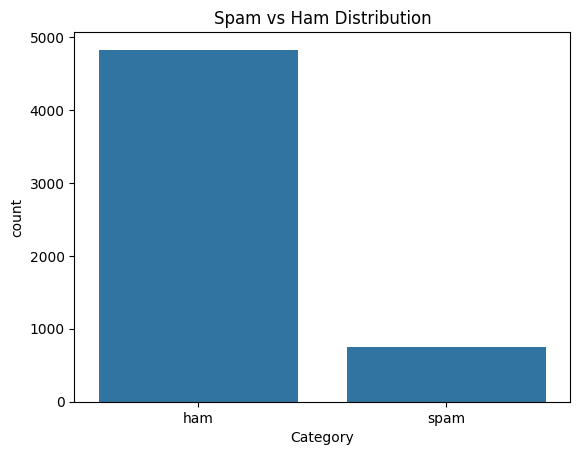

In [18]:
sns.countplot(x='Category', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

4️⃣ Message Length Analysis

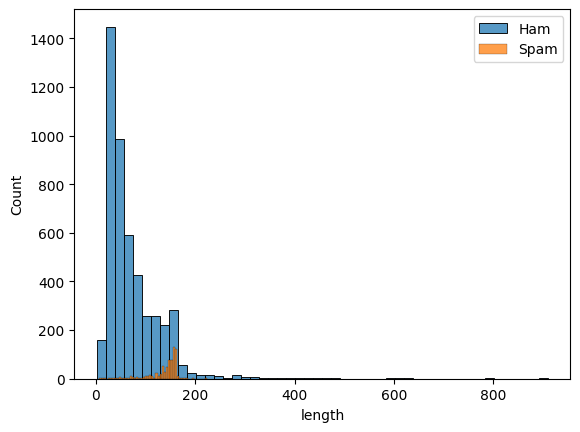

In [19]:
df['length'] = df['Message'].apply(len)

sns.histplot(df[df['Category']=='ham']['length'], bins=50)
sns.histplot(df[df['Category']=='spam']['length'], bins=50)
plt.legend(['Ham', 'Spam'])
plt.show()


🔍 Insight:

Spam messages are usually longer.

🟡 SPRINT 1 — TEXT PREPROCESSING

5️⃣ Encode Labels

In [21]:
df['label'] = df['Category'].map({'ham': 0, 'spam': 1})

6️⃣ Text Cleaning Function

In [31]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)

    words = [i for i in tokens if i.isalnum()]
    words = [i for i in words if i not in stopwords.words('english')]
    words = [ps.stem(i) for i in words]

    return " ".join(words)

7️⃣ Apply Preprocessing

In [32]:
df['transformed_text'] = df['Message'].apply(transform_text)
df.head()

,Category,Message,length,label,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,nah think goe usf live around though


🔵 SPRINT 2 — MODEL DEVELOPMENT

8️⃣ Train-Test Split

In [34]:
X = df['transformed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

9️⃣ TF-IDF Vectorization

In [36]:
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

🔟 Train Model

In [37]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

1️⃣1️⃣ Evaluate Model

In [38]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



🟣 SPRINT 3 — SAVE MODEL

In [39]:
import pickle

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))